In [5]:
from statsmodels.stats.proportion import proportion_confint
import pandas as pd
from scipy import stats
import numpy as np

Большая часть млекопитающих неспособны во взрослом возрасте переваривать лактозу, содержащуюся в молоке. У людей за расщепление лактозы отвечает фермент лактаза, кодируемый геном LCT. У людей с вариантом 13910T этого гена лактаза продолжает функционировать на протяжении всей жизни. Распределение этого варианта гена сильно варьируется в различных генетических популяциях.

Из 50 исследованных представителей народа майя вариант 13910T был обнаружен у одного. Постройте нормальный 95% доверительный интервал для доли носителей варианта 13910T в популяции майя. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.

In [6]:
p = 1./50
d = stats.norm.ppf(1-0.05/2)*np.sqrt(p*(1-p)/50)
print("confidence interval: [%f, %f]" % (p - d, p + d))
# from statsmodels.stats.proportion import proportion_confint
# proportion_confint(1, 50, method = 'normal')


confidence interval: [-0.018805, 0.058805]


В условиях предыдущей задачи постройте 95% доверительный интервал Уилсона для доли носителей варианта 13910T в популяции майя. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.

In [7]:
conf_interval = proportion_confint(1, 50, method = 'wilson')
conf_interval

(0.003539259271646236, 0.10495443589637815)

Пусть в популяции майя действительно 2% носителей варианта 13910T, как в выборке, которую мы исследовали. Какой объём выборки нужен, чтобы с помощью нормального интервала оценить долю носителей гена 13910T с точностью 0.01±0.01 на уровне доверия 95%?

In [8]:
from statsmodels.stats.proportion import samplesize_confint_proportion
n_samples = int(np.ceil(samplesize_confint_proportion(p, 0.01)))
n_samples

753

Постройте график зависимости объёма выборки, необходимого для оценки для доли носителей гена 13910T с точностью ±0.01 на уровне доверия 95%, от неизвестного параметра pp. Посмотрите, при каком значении pp нужно больше всего испытуемых. Как вы думаете, насколько вероятно, что выборка, которую мы анализируем, взята из случайной величины с этим значением параметра?

Как бы вы не ответили на последний вопрос, рассмотреть объём выборки, необходимый при таком pp, всё равно полезно — это даёт максимально пессимистичную оценку необходимого объёма выборки.

Какой объём выборки нужен в худшем случае, чтобы с помощью нормального интервала оценить долю носителей гена 13910T с точностью ±0.01 на уровне доверия 95%?

In [9]:
y = lambda p: (stats.norm.ppf(1-0.05/2)**2)*p*(1-p)/0.0001 # n = ...

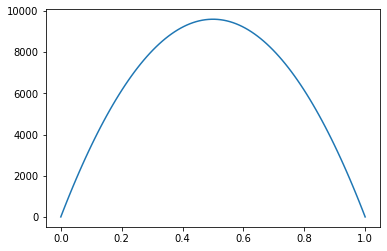

In [16]:
import matplotlib.pyplot as plt
x = np.linspace(0, 1, 100)
plt.plot(x, y(x))

Приблизительно при p = 0.5 нужно больше всего испытуемых
$$ \hat{p} = \frac{b}{n}$$


In [25]:
int(np.ceil(y(0.5))) # объем выборки при p = 0.02

9604